In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

sns.set_style('white')
#Input data
in_file = './data_res.csv'
df = pd.read_csv(in_file)

In [3]:
df[['hiv', 'cb']]
df['HIV-status'] = df['hiv'].map({0: 'HIV-', 1: 'HIV+'})
df['CB-status'] = df['cb'].map({0: 'non-user', 1: 'user'})
df['group'] = df['HIV-status'] + ', ' + df['CB-status']

# We need a separate dataframe for each group
hiv_pos_df = df.loc[df['HIV-status'] == 'HIV+']
hiv_neg_df = df.loc[df['HIV-status'] == 'HIV-']

/Users/jflanner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/jflanner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/jflanner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:137: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/jflanner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:183: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


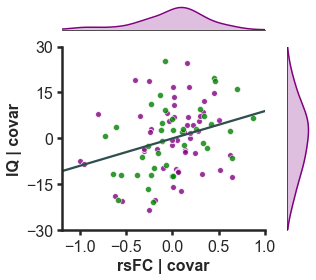

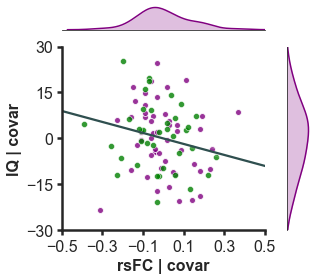

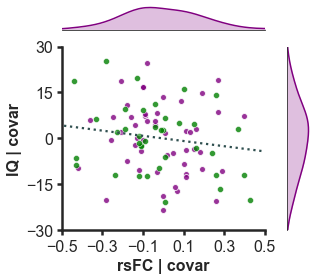

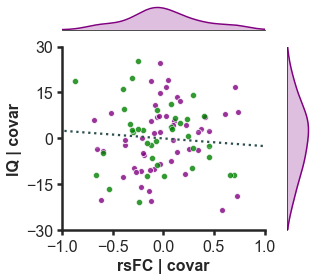

In [4]:
# Then we make the jointplot for one of the groups only
jgrid = sns.jointplot(x='postcentral_RES', y='RES_IQ', 
                      data=hiv_pos_df, kind='reg',
                      height=6, color='purple', label='HIV+',
                      joint_kws=dict(scatter_kws=dict(edgecolor='white')), ci=False,
                      marginal_kws=dict(hist=False, kde_kws={'shade': True}),  # you can control axes with dicts
                      xlim=(-100, 500), ylim=(-100, 500), truncate=False)  # note the huge limits
fig = jgrid.fig
ax_joint = jgrid.ax_joint
ax_x = jgrid.ax_marg_x
ax_y = jgrid.ax_marg_y

# Add the HIV-negative central regression plot to the joint axis
sns.regplot(x='postcentral_RES', y='RES_IQ', data=hiv_neg_df, ax=ax_joint,
            color='green', label='HIV-', scatter_kws=dict(edgecolor='white', linewidth=0.6), ci=False, truncate=False)


# Add the HIV-negative central regression plot to the joint axis
sns.regplot(x='postcentral_RES', y='RES_IQ', data=df, ax=ax_joint,
            color='darkslategray', label='all', scatter=False, scatter_kws=dict(edgecolor='white', linewidth=0.6), ci=False, truncate=False)

# Clean up the axes
ax_y.set_ylabel(None)
ax_x.set_xlabel(None)
ax_joint.set_xticks([-1, -0.5, 0, 0.5, 1])
ax_joint.set_xlim(-1.2,1)
ax_joint.spines['left'].set_linewidth(2.5)
ax_joint.spines['bottom'].set_linewidth(2.5)
ax_joint.set_yticks([-30, -15, 0, 15, 30])
ax_joint.set_ylim(-30, 30)
ax_joint.tick_params(axis='both', which='major', labelsize=16)
# Add a legend
ax_joint.legend(fontsize=16)
ax_joint.lines[1].set_linestyle("")
ax_joint.lines[0].set_linestyle("")
#ax_joint.lines[2].set_linestyle(":")
ax_joint.set_xlabel('rsFC | covar', fontsize=16, fontweight='bold')
ax_joint.set_ylabel('IQ | covar', fontsize=16, fontweight='bold')
fig.set_size_inches((4.5, 4))
ax_joint.tick_params(axis='both', which='major', labelsize=16,direction='out', length=5, left=True, bottom=True, width=2.5)
ax_joint.legend().set_visible(False)
fig.tight_layout()
fig.savefig(fname='./RES_IQ_postcentral')
fig.show()

#######################################################################

# Then we make the jointplot for one of the groups only
jgrid = sns.jointplot(x='SMA_RES', y='RES_IQ', 
                      data=hiv_pos_df, kind='reg',
                      height=6, color='purple', label='HIV+',
                      joint_kws=dict(scatter_kws=dict(edgecolor='white')), ci=False,
                      marginal_kws=dict(hist=False, kde_kws={'shade': True}),  # you can control axes with dicts
                      xlim=(-100, 500), ylim=(-100, 500), truncate=False)  # note the huge limits
fig = jgrid.fig
ax_joint = jgrid.ax_joint
ax_x = jgrid.ax_marg_x
ax_y = jgrid.ax_marg_y

# Add the HIV-negative central regression plot to the joint axis
sns.regplot(x='SMA_RES', y='RES_IQ', data=hiv_neg_df, ax=ax_joint,
            color='green', label='HIV-', scatter_kws=dict(edgecolor='white', linewidth=0.6), ci=False, truncate=False)


# Add the HIV-negative central regression plot to the joint axis
sns.regplot(x='SMA_RES', y='RES_IQ', data=df, ax=ax_joint,
            color='darkslategray', label='all', scatter=False, scatter_kws=dict(edgecolor='white', linewidth=0.6), ci=False, truncate=False)

# Clean up the axes
ax_y.set_ylabel(None)
ax_x.set_xlabel(None)
ax_joint.set_xticks([-0.5, -0.3, -0.1, 0.1, 0.3, 0.5])
ax_joint.set_xlim(-0.5, 0.5)
ax_joint.spines['left'].set_linewidth(2.5)
ax_joint.spines['bottom'].set_linewidth(2.5)
ax_joint.set_yticks([-30, -15, 0, 15, 30])
ax_joint.set_ylim(-30, 30)
ax_joint.tick_params(axis='both', which='major', labelsize=16)
# Add a legend
ax_joint.legend(fontsize=16)
ax_joint.lines[1].set_linestyle("")
ax_joint.lines[0].set_linestyle("")
#ax_joint.lines[2].set_linestyle(":")
ax_joint.set_xlabel('rsFC | covar', fontsize=16, fontweight='bold')
ax_joint.set_ylabel('IQ | covar', fontsize=16, fontweight='bold')
fig.set_size_inches((4.5, 4))
ax_joint.tick_params(axis='both', which='major', labelsize=16,direction='out', length=5, left=True, bottom=True, width=2.5)
ax_joint.legend().set_visible(False)
fig.tight_layout()
fig.savefig(fname='./RES_IQ_SMA')
fig.show()

#######################################################################
# Then we make the jointplot for one of the groups only
jgrid = sns.jointplot(x='prim_motor_RES', y='RES_IQ', 
                      data=hiv_pos_df, kind='reg',
                      height=6, color='purple', label='HIV+',
                      joint_kws=dict(scatter_kws=dict(edgecolor='white')), ci=False,
                      marginal_kws=dict(hist=False, kde_kws={'shade': True}),  # you can control axes with dicts
                      xlim=(-100, 500), ylim=(-100, 500), truncate=False)  # note the huge limits
fig = jgrid.fig
ax_joint = jgrid.ax_joint
ax_x = jgrid.ax_marg_x
ax_y = jgrid.ax_marg_y

# Add the HIV-negative central regression plot to the joint axis
sns.regplot(x='prim_motor_RES', y='RES_IQ', data=hiv_neg_df, ax=ax_joint,
            color='green', label='HIV-', scatter_kws=dict(edgecolor='white', linewidth=0.6), ci=False, truncate=False)


# Add the HIV-negative central regression plot to the joint axis
sns.regplot(x='prim_motor_RES', y='RES_IQ', data=df, ax=ax_joint,
            color='darkslategray', label='all', scatter=False, scatter_kws=dict(edgecolor='white', linewidth=0.6), ci=False, truncate=False)

# Clean up the axes
ax_y.set_ylabel(None)
ax_x.set_xlabel(None)
ax_joint.set_xticks([-0.5, -0.3, -0.1, 0.1, 0.3, 0.5])
ax_joint.set_xlim(-0.5, 0.5)
ax_joint.spines['left'].set_linewidth(2.5)
ax_joint.spines['bottom'].set_linewidth(2.5)
ax_joint.set_yticks([-30, -15, 0, 15, 30])
ax_joint.set_ylim(-30, 30)
ax_joint.tick_params(axis='both', which='major', labelsize=16)
# Add a legend
ax_joint.legend(fontsize=16)
ax_joint.lines[1].set_linestyle("")
ax_joint.lines[0].set_linestyle("")
ax_joint.lines[2].set_linestyle(":")
ax_joint.set_xlabel('rsFC | covar', fontsize=16, fontweight='bold')
ax_joint.set_ylabel('IQ | covar', fontsize=16, fontweight='bold')
fig.set_size_inches((4.5, 4))
ax_joint.tick_params(axis='both', which='major', labelsize=16,direction='out', length=5, left=True, bottom=True, width=2.5)
ax_joint.legend().set_visible(False)
fig.tight_layout()
fig.savefig(fname='./RES_IQ_primary_motor')
fig.show()

#######################################################################
# Then we make the jointplot for one of the groups only
jgrid = sns.jointplot(x='precentral_RES', y='RES_IQ', 
                      data=hiv_pos_df, kind='reg',
                      height=6, color='purple', label='HIV+',
                      joint_kws=dict(scatter_kws=dict(edgecolor='white')), ci=False,
                      marginal_kws=dict(hist=False, kde_kws={'shade': True}),  # you can control axes with dicts
                      xlim=(-100, 500), ylim=(-100, 500), truncate=False)  # note the huge limits
fig = jgrid.fig
ax_joint = jgrid.ax_joint
ax_x = jgrid.ax_marg_x
ax_y = jgrid.ax_marg_y

# Add the HIV-negative central regression plot to the joint axis
sns.regplot(x='precentral_RES', y='RES_IQ', data=hiv_neg_df, ax=ax_joint,
            color='green', label='HIV-', scatter_kws=dict(edgecolor='white', linewidth=0.6), ci=False, truncate=False)


# Add the HIV-negative central regression plot to the joint axis
sns.regplot(x='precentral_RES', y='RES_IQ', data=df, ax=ax_joint,
            color='darkslategray', label='all', scatter=False, scatter_kws=dict(edgecolor='white', linewidth=0.6), ci=False, truncate=False)

# Clean up the axes
ax_y.set_ylabel(None)
ax_x.set_xlabel(None)
ax_joint.set_xticks([-1, -0.5, 0, 0.5, 1])
ax_joint.set_xlim(-1,1)
ax_joint.spines['left'].set_linewidth(2.5)
ax_joint.spines['bottom'].set_linewidth(2.5)
ax_joint.set_yticks([-30, -15, 0, 15, 30])
ax_joint.set_ylim(-30, 30)
ax_joint.tick_params(axis='both', which='major', labelsize=16)
# Add a legend
ax_joint.legend(fontsize=16)
ax_joint.lines[1].set_linestyle("")
ax_joint.lines[0].set_linestyle("")
ax_joint.lines[2].set_linestyle(":")
ax_joint.set_xlabel('rsFC | covar', fontsize=16, fontweight='bold')
ax_joint.set_ylabel('IQ | covar', fontsize=16, fontweight='bold')
fig.set_size_inches((4.5, 4))
ax_joint.tick_params(axis='both', which='major', labelsize=16,direction='out', length=5, left=True, bottom=True, width=2.5)
ax_joint.legend().set_visible(False)
fig.tight_layout()
fig.savefig(fname='./RES_IQ_precentral')
fig.show()

#######################################################################




/Users/jflanner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/jflanner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/jflanner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:138: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/jflanner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:185: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


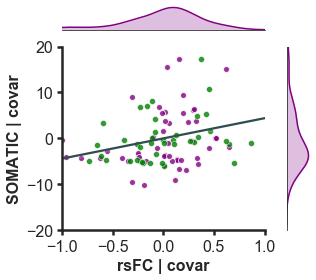

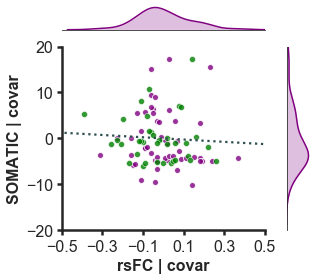

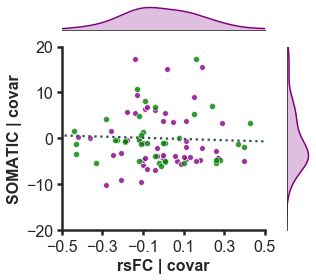

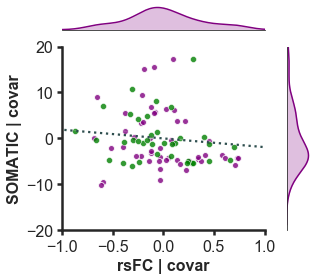

In [5]:
# Then we make the jointplot for one of the groups only
jgrid = sns.jointplot(x='postcentral_RES', y='somatic_RES', 
                      data=hiv_pos_df, kind='reg',
                      height=6, color='purple', label='HIV+',
                      joint_kws=dict(scatter_kws=dict(edgecolor='white')), ci=False,
                      marginal_kws=dict(hist=False, kde_kws={'shade': True}),  # you can control axes with dicts
                      xlim=(-100, 500), ylim=(-100, 500), truncate=False)  # note the huge limits
fig = jgrid.fig
ax_joint = jgrid.ax_joint
ax_x = jgrid.ax_marg_x
ax_y = jgrid.ax_marg_y

# Add the HIV-negative central regression plot to the joint axis
sns.regplot(x='postcentral_RES', y='somatic_RES', data=hiv_neg_df, ax=ax_joint,
            color='green', label='HIV-', scatter_kws=dict(edgecolor='white', linewidth=0.6), ci=False, truncate=False)


# Add the HIV-negative central regression plot to the joint axis
sns.regplot(x='postcentral_RES', y='somatic_RES', data=df, ax=ax_joint,
            color='darkslategray', label='all', scatter=False, scatter_kws=dict(edgecolor='white', linewidth=0.6), ci=False, truncate=False)

# Clean up the axes
ax_y.set_ylabel(None)
ax_x.set_xlabel(None)
ax_joint.set_xticks([-1, -0.5, 0, 0.5, 1])
ax_joint.set_xlim(-1,1)
ax_joint.spines['left'].set_linewidth(2.5)
ax_joint.spines['bottom'].set_linewidth(2.5)
ax_joint.set_yticks([-20, -10, 0, 10, 20])
ax_joint.set_ylim(-20, 20)
ax_joint.tick_params(axis='both', which='major', labelsize=16)
# Add a legend
ax_joint.legend(fontsize=16)
ax_joint.lines[1].set_linestyle("")
ax_joint.lines[0].set_linestyle("")
#ax_joint.lines[2].set_linestyle(":")
ax_joint.set_xlabel('rsFC | covar', fontsize=16, fontweight='bold')
ax_joint.set_ylabel('SOMATIC | covar', fontsize=16, fontweight='bold')
fig.set_size_inches((4.5, 4))
ax_joint.tick_params(axis='both', which='major', labelsize=16,direction='out', length=5, left=True, bottom=True, width=2.5)
ax_joint.legend().set_visible(False)
fig.tight_layout()
fig.savefig(fname='./RES_SOM_RES_postcentral')
fig.show()

#######################################################################

# Then we make the jointplot for one of the groups only
jgrid = sns.jointplot(x='SMA_RES', y='somatic_RES', 
                      data=hiv_pos_df, kind='reg',
                      height=6, color='purple', label='HIV+',
                      joint_kws=dict(scatter_kws=dict(edgecolor='white')), ci=False,
                      marginal_kws=dict(hist=False, kde_kws={'shade': True}),  # you can control axes with dicts
                      xlim=(-100, 500), ylim=(-100, 500), truncate=False)  # note the huge limits
fig = jgrid.fig
ax_joint = jgrid.ax_joint
ax_x = jgrid.ax_marg_x
ax_y = jgrid.ax_marg_y

# Add the HIV-negative central regression plot to the joint axis
sns.regplot(x='SMA_RES', y='somatic_RES', data=hiv_neg_df, ax=ax_joint,
            color='green', label='HIV-', scatter_kws=dict(edgecolor='white', linewidth=0.6), ci=False, truncate=False)


# Add the HIV-negative central regression plot to the joint axis
sns.regplot(x='SMA_RES', y='somatic_RES', data=df, ax=ax_joint,
            color='darkslategray', label='all', scatter=False, scatter_kws=dict(edgecolor='white', linewidth=0.6), ci=False, truncate=False)

# Clean up the axes
ax_y.set_ylabel(None)
ax_x.set_xlabel(None)
ax_joint.set_xticks([-0.5, -0.3, -0.1, 0.1, 0.3, 0.5])
ax_joint.set_xlim(-0.5, 0.5)
ax_joint.spines['left'].set_linewidth(2.5)
ax_joint.spines['bottom'].set_linewidth(2.5)
ax_joint.set_yticks([-20, -10, 0, 10, 20])
ax_joint.set_ylim(-20, 20)
ax_joint.tick_params(axis='both', which='major', labelsize=16)
# Add a legend
ax_joint.legend(fontsize=16)
ax_joint.lines[1].set_linestyle("")
ax_joint.lines[0].set_linestyle("")
ax_joint.lines[2].set_linestyle(":")
ax_joint.set_xlabel('rsFC | covar', fontsize=16, fontweight='bold')
ax_joint.set_ylabel('SOMATIC | covar', fontsize=16, fontweight='bold')
fig.set_size_inches((4.5, 4))
ax_joint.tick_params(axis='both', which='major', labelsize=16,direction='out', length=5, left=True, bottom=True, width=2.5)
ax_joint.legend().set_visible(False)
fig.tight_layout()
fig.savefig(fname='./RES_SOM_RES_SMA')
fig.show()

#######################################################################

# Then we make the jointplot for one of the groups only
jgrid = sns.jointplot(x='prim_motor_RES', y='somatic_RES', 
                      data=hiv_pos_df, kind='reg',
                      height=6, color='purple', label='HIV+',
                      joint_kws=dict(scatter_kws=dict(edgecolor='white')), ci=False,
                      marginal_kws=dict(hist=False, kde_kws={'shade': True}),  # you can control axes with dicts
                      xlim=(-100, 500), ylim=(-100, 500), truncate=False)  # note the huge limits
fig = jgrid.fig
ax_joint = jgrid.ax_joint
ax_x = jgrid.ax_marg_x
ax_y = jgrid.ax_marg_y

# Add the HIV-negative central regression plot to the joint axis
sns.regplot(x='prim_motor_RES', y='somatic_RES', data=hiv_neg_df, ax=ax_joint,
            color='green', label='HIV-', scatter_kws=dict(edgecolor='white', linewidth=0.6), ci=False, truncate=False)


# Add the HIV-negative central regression plot to the joint axis
sns.regplot(x='prim_motor_RES', y='somatic_RES', data=df, ax=ax_joint,
            color='darkslategray', label='all', scatter=False, scatter_kws=dict(edgecolor='white', linewidth=0.6), ci=False, truncate=False)

# Clean up the axes
ax_y.set_ylabel(None)
ax_x.set_xlabel(None)
ax_joint.set_xticks([-0.5, -0.3, -0.1, 0.1, 0.3, 0.5])
ax_joint.set_xlim(-0.5, 0.5)
ax_joint.spines['left'].set_linewidth(2.5)
ax_joint.spines['bottom'].set_linewidth(2.5)
ax_joint.set_yticks([-20, -10, 0, 10, 20])
ax_joint.set_ylim(-20, 20)
ax_joint.tick_params(axis='both', which='major', labelsize=16)
# Add a legend
ax_joint.legend(fontsize=16)
ax_joint.lines[1].set_linestyle("")
ax_joint.lines[0].set_linestyle("")
ax_joint.lines[2].set_linestyle(":")
ax_joint.set_xlabel('rsFC | covar', fontsize=16, fontweight='bold')
ax_joint.set_ylabel('SOMATIC | covar', fontsize=16, fontweight='bold')
fig.set_size_inches((4.5, 4))
ax_joint.tick_params(axis='both', which='major', labelsize=16,direction='out', length=5, left=True, bottom=True, width=2.5)
ax_joint.legend().set_visible(False)
fig.tight_layout()
fig.savefig(fname='./RES_SOM_RES_prim_motor')
fig.show()

#######################################################################

# Then we make the jointplot for one of the groups only
jgrid = sns.jointplot(x='precentral_RES', y='somatic_RES', 
                      data=hiv_pos_df, kind='reg',
                      height=6, color='purple', label='HIV+',
                      joint_kws=dict(scatter_kws=dict(edgecolor='white')), ci=False,
                      marginal_kws=dict(hist=False, kde_kws={'shade': True}),  # you can control axes with dicts
                      xlim=(-100, 500), ylim=(-100, 500), truncate=False)  # note the huge limits
fig = jgrid.fig
ax_joint = jgrid.ax_joint
ax_x = jgrid.ax_marg_x
ax_y = jgrid.ax_marg_y

# Add the HIV-negative central regression plot to the joint axis
sns.regplot(x='precentral_RES', y='somatic_RES', data=hiv_neg_df, ax=ax_joint,
            color='green', label='HIV-', scatter_kws=dict(edgecolor='white', linewidth=0.6), ci=False, truncate=False)


# Add the HIV-negative central regression plot to the joint axis
sns.regplot(x='precentral_RES', y='somatic_RES', data=df, ax=ax_joint,
            color='darkslategray', label='all', scatter=False, scatter_kws=dict(edgecolor='white', linewidth=0.6), ci=False, truncate=False)

# Clean up the axes
ax_y.set_ylabel(None)
ax_x.set_xlabel(None)
ax_joint.set_xticks([-1, -0.5, 0, 0.5, 1])
ax_joint.set_xlim(-1,1)
ax_joint.spines['left'].set_linewidth(2.5)
ax_joint.spines['bottom'].set_linewidth(2.5)
ax_joint.set_yticks([-20, -10, 0, 10, 20])
ax_joint.set_ylim(-20, 20)
ax_joint.tick_params(axis='both', which='major', labelsize=16)
# Add a legend
ax_joint.legend(fontsize=16)
ax_joint.lines[1].set_linestyle("")
ax_joint.lines[0].set_linestyle("")
ax_joint.lines[2].set_linestyle(":")
ax_joint.set_xlabel('rsFC | covar', fontsize=16, fontweight='bold')
ax_joint.set_ylabel('SOMATIC | covar', fontsize=16, fontweight='bold')
fig.set_size_inches((4.5, 4))
ax_joint.tick_params(axis='both', which='major', labelsize=16,direction='out', length=5, left=True, bottom=True, width=2.5)
ax_joint.legend().set_visible(False)
fig.tight_layout()
fig.savefig(fname='./RES_SOM_RES_precentral')
fig.show()

#######################################################################

